In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [16]:
def group_bar_plot(group_list, x_tick, legend, title, y_label, saved_name=None):
    assert(len(x_tick) == len(group_list))
    x = np.arange(len(x_tick))  # the label locations
    width = 1.0/(len(legend)+2)
    multiplier = 1
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(16, 10))
    ax = plt.gca()

    for i in range(len(legend)):
        data = group_list[:, i]
        offset = width * multiplier
        rects = ax.bar(x + offset, data, width, label=legend[i])
#         ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    ax.set_xticks(x + 0.5)
    ax.set_xticklabels(x_tick)
#     ax.legend(loc="upper left", bbox_to_anchor=(1.05, 0.9))
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)
    ax.set_yscale('log')
    if saved_name:
        fig.savefig(saved_name)
    plt.show()

In [3]:
def get_data(csv_file, group, item, idx=4, keep_unconverged=True):
    result = np.zeros((len(group), len(item)))
    group_idx = 0
    item_idx = 0
    with open(csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row[0] == "matrix":
                continue
            if group[group_idx] not in row[0]:
                continue
#             assert(row[0] == group[group_idx] + '_mixed' + item[item_idx])
            if int(row[2]) == 700 and keep_unconverged:
                result[group_idx, item_idx] = np.nan
            else:
                result[group_idx, item_idx] = np.double(row[idx])
            item_idx = (item_idx + 1) % len(item)
            if item_idx == 0:
                group_idx = (group_idx + 1)
    assert(group_idx == len(group))
    return result

In [6]:
legend=["0", "1", "2", "3", "-11", "-12", "-13", "-21", "-22", "-23"]
legend_alias=["V/M: d", "V/M: d-s", "V/M: d-s-h", "V/M: d-h", 
              "V: d-s, M: s", "V: d-s, M: h", "V: d-s, M: d-s-h",
              "V: d, M: s", "V: d, M: h", "V: d, M: d-s-h"]
x_tick=["2cubes_sphere", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_alias=["2cubes", "cage13", "cage14", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_jb=["2cubes_sphere", "cage13", "cage14", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_jb_alias=["2cubes", "cage13", "cage14", "thermal2", "tmt_sym", "beam", "l-shape"]
x_tick_cheyb=["2cubes_sphere", "offshore", "thermal2", "tmt_sym", "beam-pw-sv0.1-o-3-l-3", "l-shape-const-o-3-l-7"]
x_tick_cheyb_alias=["2cubes", "offshore", "thermal2", "tmt_sym", "beam", "l-shape"]

In [17]:
def generate_saved_name(title, kind):
    name = title + ' ' + kind + '.png'
    return name.replace(' ', '_')
def plot_total_speedup(filename, title, is_jacobi=True):
    x = x_tick_jb if is_jacobi else x_tick_cheyb
    x_alias = x_tick_jb_alias if is_jacobi else x_tick_cheyb_alias
    result = get_data(filename, x, legend, 4)
    speedup = result[:, [0]]/result
    speedup = speedup * (speedup >= 1)
    saved_name = generate_saved_name(title, 'total time speedup')
    group_bar_plot(speedup, x_alias, legend_alias, title, 'total time speedup', saved_name)

def plot_time_per_iter(filename, title):
    x = x_tick
    x_alias = x_tick_alias
    result = get_data(filename, x, legend, 5, keep_unconverged=True)
    speedup = result[:, [0]]/result
    saved_name = generate_saved_name(title, 'time per iteration speedup')
    group_bar_plot(speedup, x_alias, legend_alias, title, 'time per iteration speedup', saved_name)

def plot_iteration(filename, title, is_jacobi=True):
    x = x_tick_jb if is_jacobi else x_tick_cheyb
    x_alias = x_tick_jb_alias if is_jacobi else x_tick_cheyb_alias
    result = get_data(filename, x, legend, 2)
#     speedup = result[:, [0]]/result
#     speedup = speedup * (speedup >= 1)
    saved_name = generate_saved_name(title, 'iteration')
    group_bar_plot(speedup, x_alias, legend_alias, title, 'iteration', saved_name)

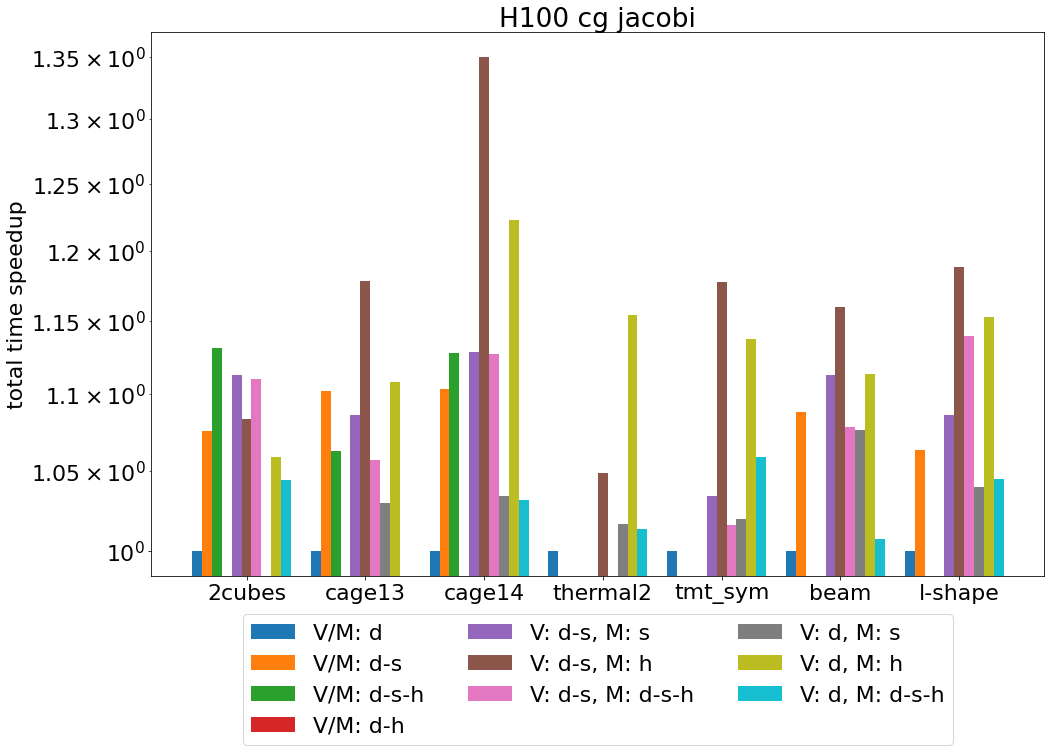

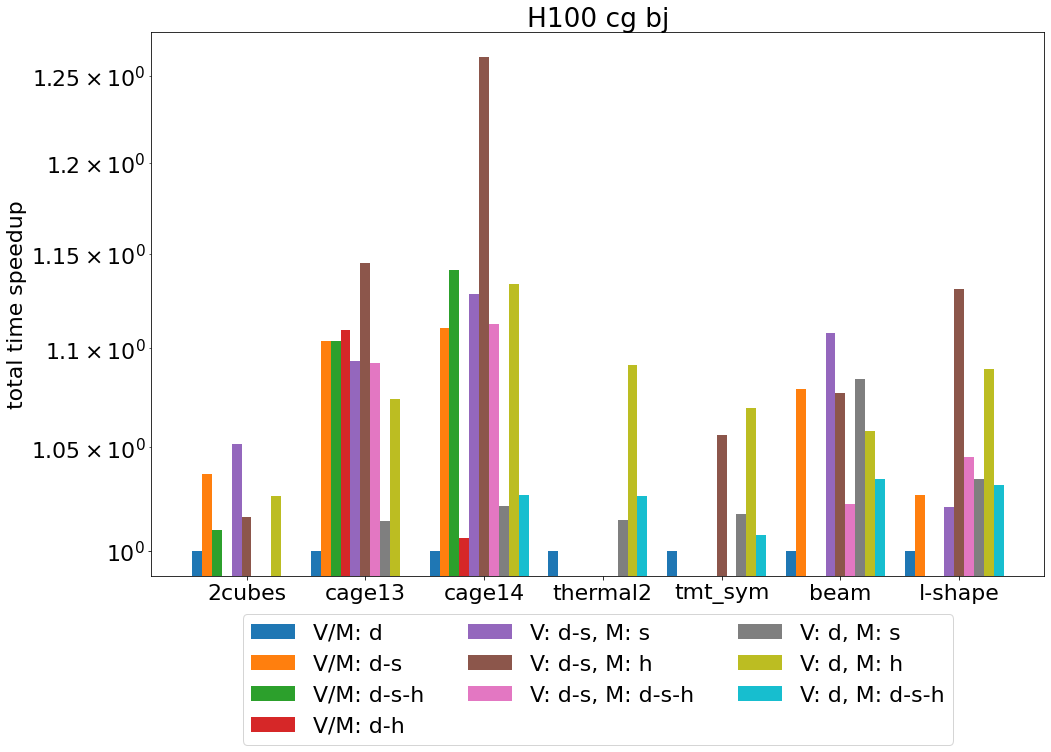

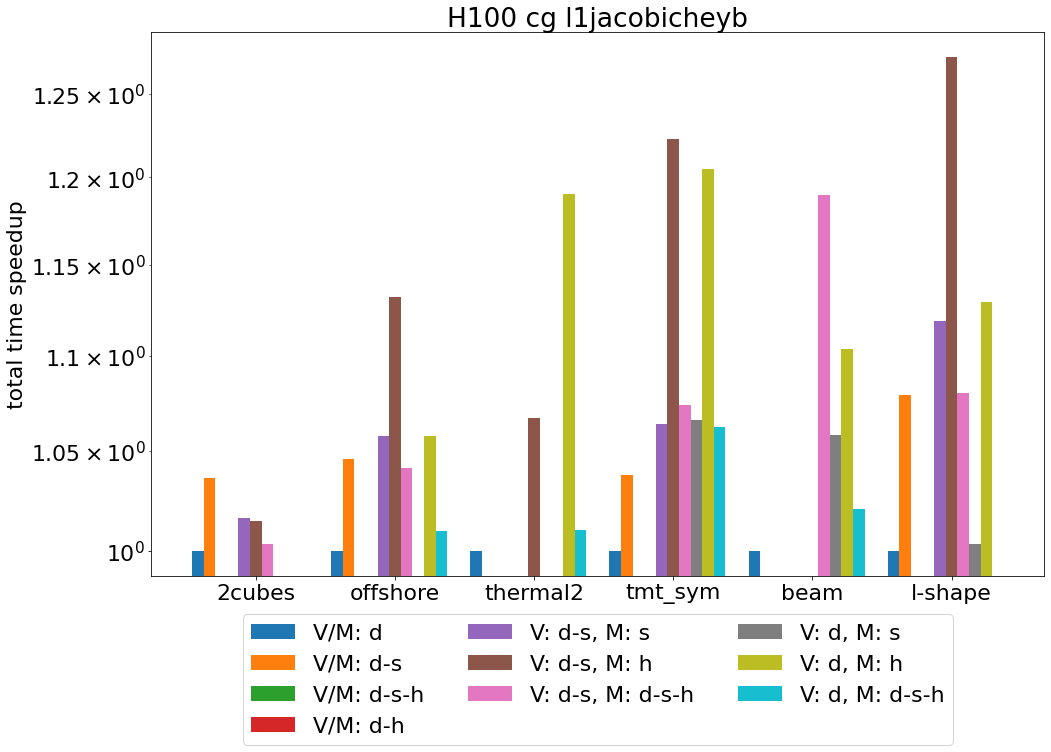

In [18]:
plot_total_speedup('h100/collect_case_10_v_cg_jacobi.csv', "H100 cg jacobi")
plot_total_speedup('h100/collect_case_10_v_cg_bj.csv', "H100 cg bj")
plot_total_speedup('h100/collect_case_10_v_cg_l1cheyb.csv', "H100 cg l1jacobicheyb", is_jacobi=False)

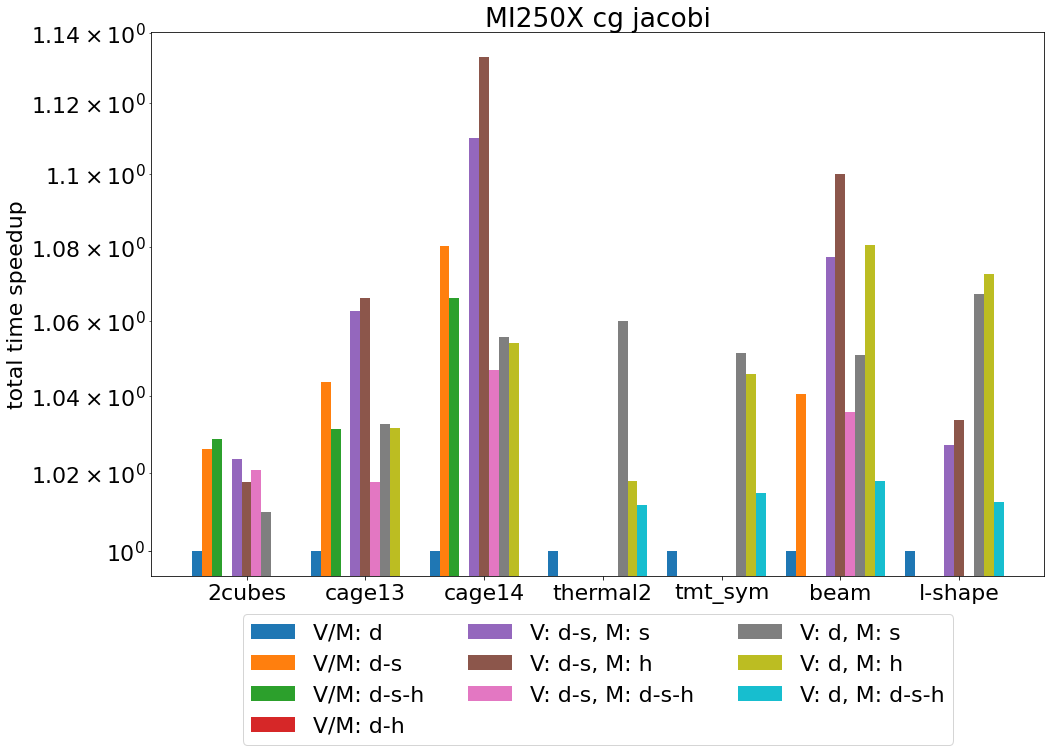

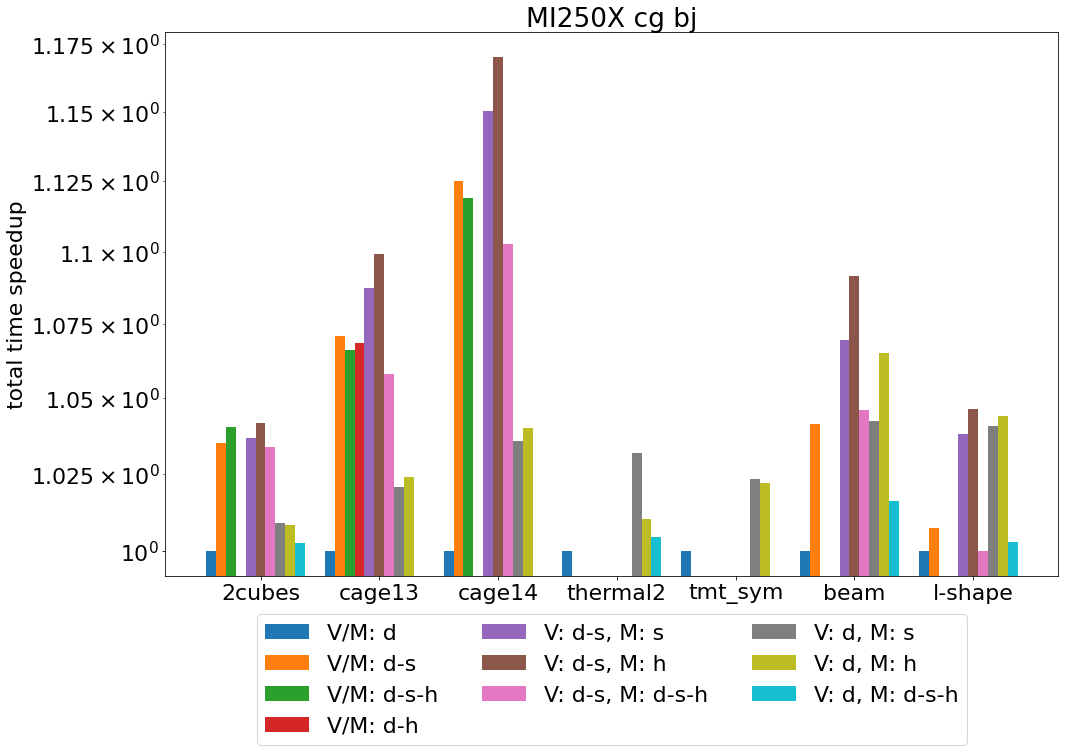

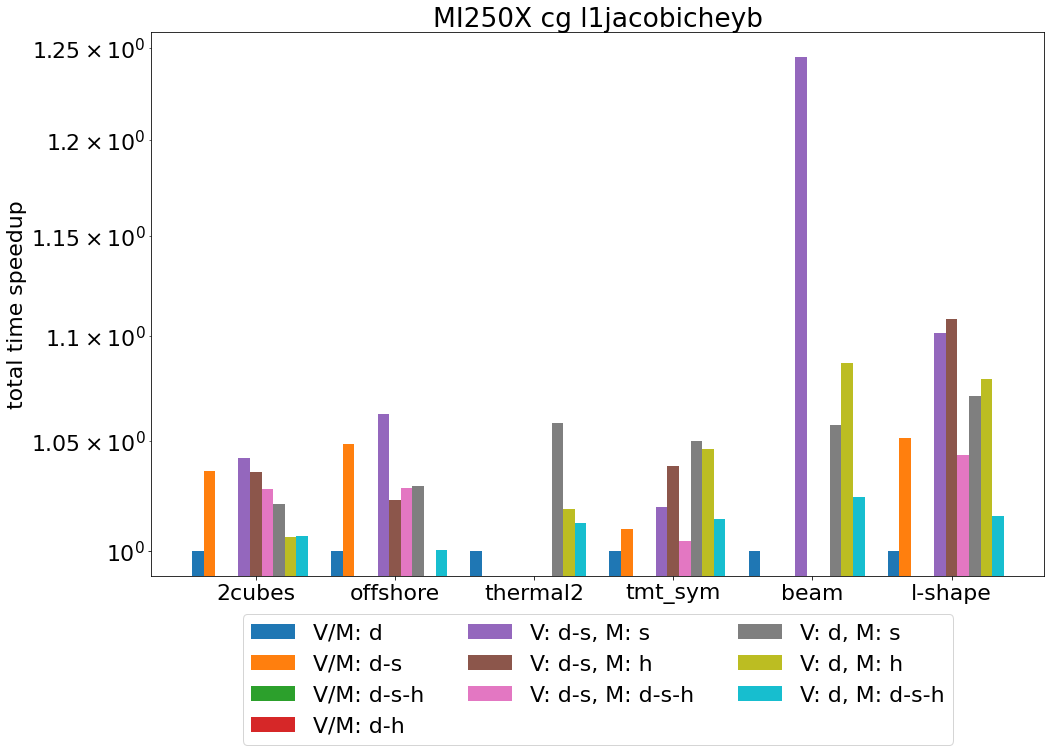

In [19]:
plot_total_speedup('mi250x/collect_case_10_v_cg_jacobi.csv', "MI250X cg jacobi")
plot_total_speedup('mi250x/collect_case_10_v_cg_bj.csv', "MI250X cg bj")
plot_total_speedup('mi250x/collect_case_10_v_cg_l1cheyb.csv', "MI250X cg l1jacobicheyb", is_jacobi=False)